<ipython-input-40-cf3b8ed41020>:61: UserWarning: No contour levels were found within the data range.
  ax.contour(rx,ry,params[i] * pot,levels = levels, cmap = 'ocean')


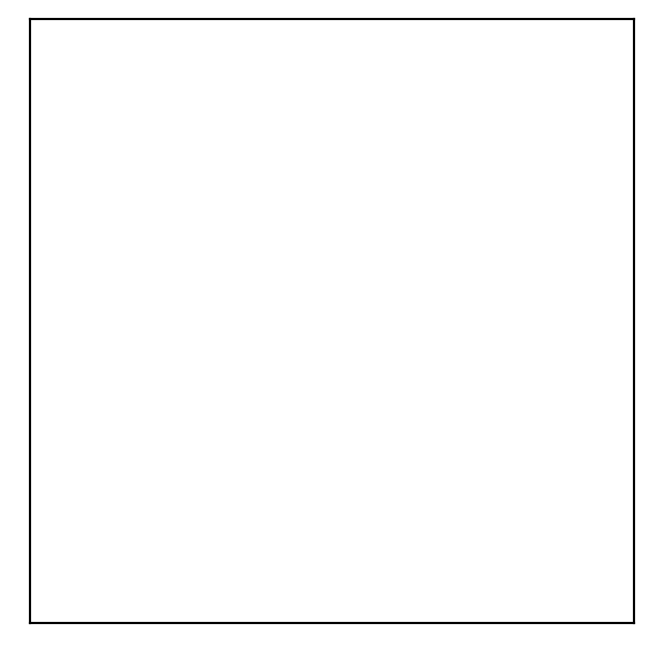

In [40]:
from matplotlib import animation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mco


a=1
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
rx, ry = np.meshgrid(x,y)
q = 1


params = np.array([])
b = 0
for i in range (200):
    while(b < 1):
        params =np.append(b,params)
        b += 0.01
    while(b > 0) :
        params =np.append(b,params)
        b -= 0.01
        
        
        
def potential(a,x,y,q1):
    return (q1/(np.sqrt((x)**2 + (y)**2)) + 1/(np.sqrt((x - a/2)**2 + (y - a/2)**2)) + 1/(np.sqrt((x + a/2)**2 + (y + a/2)**2)) \
            - 1/(np.sqrt((x-a/2)**2 + (y + a/2)**2)))- 1/(np.sqrt((x + a/2)**2 + (y-a/2)**2)) \
            



q1 = np.linspace(-10,10,200)
        
levels = np.linspace(-4,4,200)

fig = plt.figure(dpi = 200)

ax = plt.axes()
plt.axis('off')
ax.set_aspect('equal')
line, = ax.plot([], [], lw=2)


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    q = q1[i]
    pot = potential(a,rx,ry,q)
    
    ax.clear()
    
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.contour(rx,ry,params[i] * pot,levels = levels, cmap = 'ocean')
    
    
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('funkypotential.mp4', fps=20, extra_args=['-vcodec', 'libx264'])

plt.show()